 В работе исследуется зависимости прямого тока, проходящего через вакуумный диод, в зависимости от напряжения на нем, а именно та часть вольт-амперной характеристики, в которой электронное облако существенно влияет на распределение электрического поля между катодом и анодом.

Распределение потенциала по радиусу внутри диода определяется уравнением Пуассона в цилиндрических координатах:

$$\Delta V = \dfrac{d^2V}{dr^2} + \dfrac{1}{r} + \dfrac{dV}{dr} = - \dfrac{\rho(r)}{\epsilon_0}$$

При этом плотность заряда $ \rho(r) $ связана с текущим через слой диода толщины $ l $ током $ I $ формулой $ I = -2\pi r \rho(r)v(r)l$. При этом из закона сохранения энергии мы легко находим скорость $ v(r) $ электронов , прошедших через разность потенциалов $ V(r) $: $ \frac{mv^2}{2} = eV(r) $.  Отсюда мы получаем уравнение 


$$\dfrac{d^2V}{dr^2} + \dfrac{dV}{dr} = \dfrac{I}{2\pi\epsilon_0}\sqrt{\dfrac{m}{2eV}}$$


Однако, в дифференциальном уравнении 2-ого порядка относительно $ V(r) $ нам неизвестен ток I, зависящий от V. Для доопределения уравнения будем полагать:

$$\dfrac{dV}{dt}\bigg |_{r=r_k} = 0$$

Наше предположение означает что вблизи катода пространственный заряд электронов полностью экранирует поле анодной разности потенциалов.

Уравнение  является нелинейным. Попробуем  найти некое частное решение, где $ V_a = V_{a0}, $ при котором ток $ I = I_0 $. Тогда выражения 

$$I = I_o \left( \dfrac{V_a}{V{a0}} \right) ^{3/2}, \qquad V(r) = V_{a0}(r)\dfrac{V_a}{V_{a0}}$$

являются решением уравнения, что проверяется подстановкой. В общем виде решение записывается в виде

$$I = \dfrac{8\sqrt{2}\pi \epsilon_0 l}{9}\sqrt{\dfrac{e}{m}}\dfrac{1}{r_a\beta^2} V^{3/2}$$

Это и есть так называемый "<закон трех вторых"> -- ток в вакуумном диоде пропорционален напряжению на нем в степени 3/2. Он справедлив при любой геометрии электродов, если ток не слишком велик. 

Так как нам нужно найти удельный заряд электрона, выпишем в явном виде его из уравнения:

$$\dfrac{e}{m} = \dfrac{81r_a^2\beta^4}{128\pi^2\epsilon_0^2l^2} \dfrac{I^2}{V^2} = k \dfrac{I^2}{V^2}$$


Таким образом, удельный заряд электрона определяется из отношения квадрата тока к кубу напряжения, умноженный на коэффициент, зависящий от параметров установки.


В работе используется диод 2Ц2С с косвенным накалом. Радиус его катода $ r_k = 0,9 $ мм, радиус анода $ r_a = 9,5  $ мм, коэффициент $ \beta^2 = 0,98 $, длина слоя центральной части катода, покрытой оксидным слоем $ l = 9 $ мм.

Для подогрева катода и анода используются стабилизированные источники постоянного тока и напряжения. В цепь накала включено предохранительное напряжение $ R $. Анодное напряжение измеряется вольтметром источника питания, анодный ток --- многопредельным мультиметром GDM-8245.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
from labs import *
from statistics import stdev

In [39]:
z=pd.read_csv('ток13.csv')
m=pd.read_csv('ток14.csv')
v=pd.read_csv('ток15.csv')



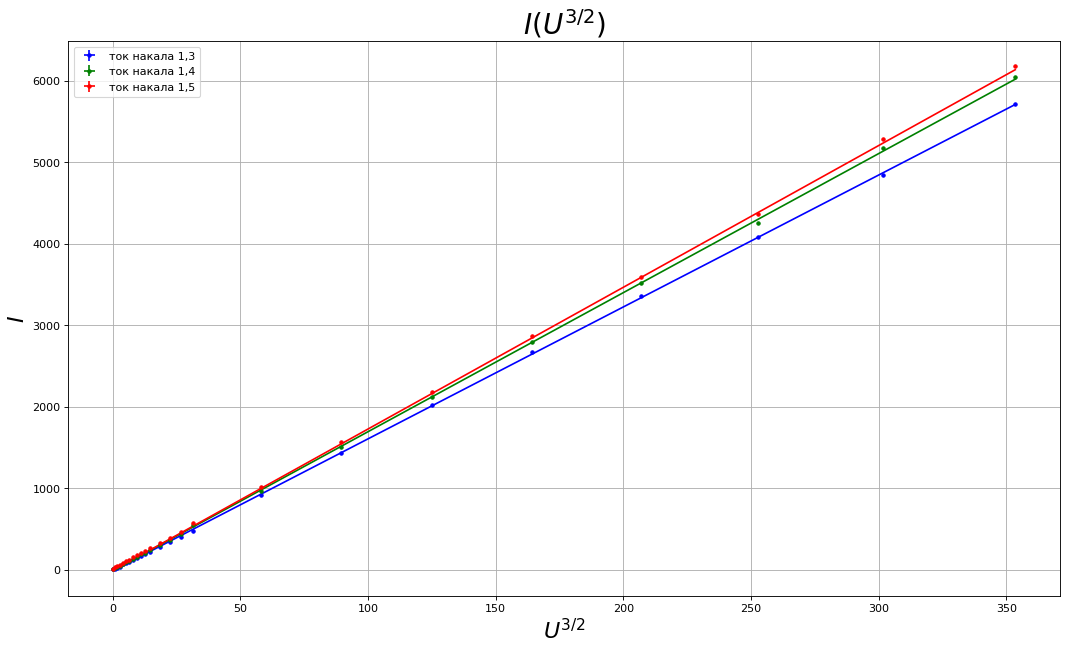

In [40]:
k1, b1 = curve_fit(line, z["V3/2"], z["I"])
k2, b2 = curve_fit(line, m["V3/2"], m["I"])
k3, b3 = curve_fit(line, v["V3/2"], v["I"])
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=z["V3/2"], xerr=z["V3/2"].agg(err), y=z["I"], yerr=z["I"].agg(get_err), fmt='.', label='ток накала 1,3', color="blue")
plt.plot(z["V3/2"], line(z["V3/2"], k1, b1), color="blue")

plt.errorbar(x=m["V3/2"], xerr=m["V3/2"].agg(err), y=m["I"], yerr=m["I"].agg(get_err), fmt='.', label='ток накала 1,4', color="green")
plt.plot(m["V3/2"], line(m["V3/2"], k2, b2), color="green")

plt.errorbar(x=v["V3/2"], xerr=v["V3/2"].agg(get_err), y=v["I"], yerr=v["I"].agg(get_err), fmt='.', label='ток накала 1,5', color="red")
plt.plot(v["V3/2"], line(v["V3/2"], k3, b3), color="red")

plt.title(r"$I(U^{3/2})$", fontsize=25)
plt.xlabel(r"$ U^{3/2} $", fontsize=20)
plt.ylabel(r"$I$", fontsize=20)
plt.grid(True)
plt.legend()

коофициент наклона=k

$$I = \dfrac{8\sqrt{2}\pi \epsilon_0 l}{9}\sqrt{\dfrac{e}{m}}\dfrac{1}{r_a\beta^2} V^{3/2}$$
$$const= \dfrac{8\sqrt{2}\pi \epsilon_0 l}{9}\dfrac{1}{r_a\beta^2}   \backsimeq 3,446 * 10^{-11}$$
$$\dfrac{e}{m}=\dfrac{k^{2}}{const^{2}}$$